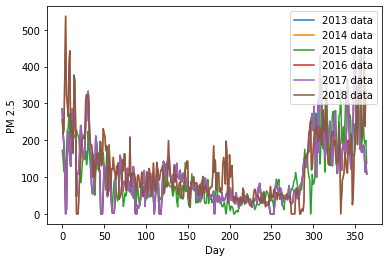

In [1]:
from ipynb.fs.full.Plot_AQI import avg_data
import requests
import sys
import pandas as pd
from bs4 import BeautifulSoup
import os
import csv

In [2]:
def meta_data(month, year):
    
    file_html = open('Data/html_data/{}/{}.html'.format(year,month), 'rb')
    plain_text = file_html.read()

    tempD = []
    finalD = []

    soup = BeautifulSoup(plain_text, "lxml")
    for table in soup.findAll('table', {'class': 'medias mensuales numspan'}):
        for tbody in table:
            for tr in tbody:
                a = tr.get_text()
                tempD.append(a)
    rows = len(tempD) / 15

    for times in range(round(rows)):
        newtempD = []
        for i in range(15):
            newtempD.append(tempD[0])
            tempD.pop(0)
        finalD.append(newtempD)

    length = len(finalD)

    finalD.pop(length - 1)
    finalD.pop(0)

    for a in range(len(finalD)):
        finalD[a].pop(14)
        finalD[a].pop(13)
        finalD[a].pop(12)
        finalD[a].pop(11)
        finalD[a].pop(10)
        finalD[a].pop(6)
        finalD[a].pop(4)
        finalD[a].pop(0)

    return finalD


In [3]:
def data_combine(year, cs):
    for a in pd.read_csv('Data/Real-Data/real_' + str(year) + '.csv', chunksize=cs):
        df = pd.DataFrame(data=a)
        mylist = df.values.tolist()
    return mylist

In [8]:
if not os.path.exists("Data/Real-Data"):
        os.makedirs("Data/Real-Data")
for year in range(2013, 2019):
    final_data = []
    with open('Data/Real-Data/real_' + str(year) + '.csv', 'w') as csvfile:
        wr = csv.writer(csvfile, dialect='excel')
        wr.writerow(
            ['T', 'TM', 'Tm', 'H', 'VV', 'V', 'VM', 'PM 2.5'])
    for month in range(1, 13):
        temp = meta_data(month, year)
        final_data = final_data + temp

    pm = avg_data(year)

    if len(pm) == 364:
        pm.insert(364, '-')

    for i in range(len(final_data)-1):
        # final[i].insert(0, i + 1)
        final_data[i].insert(7, pm[i])

    with open('Data/Real-Data/real_' + str(year) + '.csv', 'a') as csvfile:
        wr = csv.writer(csvfile, dialect='excel')
        for row in final_data:
            flag = 0
            for elem in row:
                if elem == "" or elem == "-":
                    flag = 1
            if flag != 1:
                wr.writerow(row)

data_2013 = data_combine(2013, 600)
data_2014 = data_combine(2014, 600)
data_2015 = data_combine(2015, 600)
data_2016 = data_combine(2016, 600)
data_2017 = data_combine(2017, 600)
data_2018 = data_combine(2018, 600)


total=data_2013+data_2014+data_2015+data_2016+data_2017+data_2018

with open('Data/Real-Data/Real_Combine.csv', 'w') as csvfile:
    wr = csv.writer(csvfile, dialect='excel')
    wr.writerow(
        ['T', 'TM', 'Tm', 'H', 'VV', 'V', 'VM', 'PM 2.5'])
    wr.writerows(total)
